In [11]:
#imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
#Let's open the data and see what is happening.
worldbank = pd.read_csv('/Users/ofrioren/GIT/Capstone/Data_Extract_From_World_Development_Indicators.csv')
worldbank.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ofrioren/GIT/Capstone/Data_Extract_From_World_Development_Indicators.csv'

In [ ]:
#I'm going to filter out some of the data we do not need and rearrange the DataFrame.
worldbank.columns


In [ ]:
#Deleting columns with insufficient or irrelevant data and rows with missing values.
worldbank = worldbank[['Series Name', '1990 [YR1990]', '2000 [YR2000]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]
worldbank = worldbank.drop(worldbank.index[19:24])
worldbank = worldbank.drop(worldbank.index[16])
worldbank

In [ ]:
#Renaming columns
worldbank = worldbank.rename(columns = {'Series Name': 'Series Name', '1990 [YR1990]':'1990', '2000 [YR2000]':'2000', '2014 [YR2014]':'2014', '2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017', '2018 [YR2018]':'2018', '2019 [YR2019]': '2019', '2020 [YR2020]':'2020', '2021 [YR2021]':'2021'})
worldbank

In [ ]:
#I will transpose the dataset
worldbank = worldbank.transpose()


In [ ]:
worldbank = worldbank.reset_index()
#worldbank = worldbank.rename(columns = {'Series Name': 'Year'})
worldbank

In [ ]:
print(worldbank[:1])

In [ ]:
worldbank.columns

In [ ]:
worldbank = worldbank.rename(columns = {'index':'Year', 0:'Poverty ratio at $2.15 a day', 1:'Current health expenditure (% of GDP)', 2:'Out-of-pocket expenditure per capita', 3:'Out-of-pocket expenditure (% of current healthcare)', 4:'Proportion of population pushed below the $2.1', 
                                        5:'Proportion of population pushed below the $3.6', 6:'Proportion of population pushed further below', 7:'Proportion of population spending more than 10', 8:'Proportion of population pushed further below', 9:'Risk of catastrophic expenditure for surgical', 
                                        10:'Proportion of population spending more than 25', 11:'Risk of impoverishing expenditure for surgical', 12:'Proportion of population pushed below the 60%', 13:'Proportion of population pushed further below', 
                                        14:'Proportion of people living below 50 percent o', 15:'Poverty headcount ratio at societal poverty li', 17:'Poverty headcount ratio at $3.65 a day (2017 P', 18:'Poverty headcount ratio at $6.85 a day (2017 P'})
worldbank = worldbank.drop(worldbank.index[0:2])
worldbank

In [ ]:
worldbank = worldbank.reset_index(drop=True)
worldbank

In [ ]:
worldbank.info()

In [ ]:
#I need to remove na values to get all of my columns into numerical types.
worldbank.fillna(0)
worldbank.isna().any()
worldbank

In [ ]:
#Not all of the na's appear to be changed, because some of them are strings '..', so I'll do a string replace.
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].astype('str')
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].str.replace('..', '0')
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].astype('float') 
print(worldbank['Risk of catastrophic expenditure for surgical'].dtype)

worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].astype('str')
worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].str.replace('..', '0')
worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].astype('float') 
print(worldbank['Risk of impoverishing expenditure for surgical'].dtype)

In [ ]:
#I'll check the info to see how much additional work needs to be done.
worldbank.info()

In [ ]:
#I'll change all of the columns to floats, except for year which should be an integer.
for column in worldbank.columns:
    if column != "Year":
        worldbank[column] = worldbank[column].astype('float')

worldbank['Year'] = worldbank['Year'].astype('int')

worldbank.info()

In [ ]:
#I had some issues running a simple pairplot, even with all of the data converted to numeric types. 
#I redid some of the previous work just to insure that it would run the graphs.

# Fix column names and ensure no duplicates
worldbank.columns = [
    "Year",
    "Poverty ratio at $2.15 a day",
    "Current health expenditure (% of GDP)",
    "Out-of-pocket expenditure per capita",
    "Out-of-pocket expenditure (% of current healthcare)",
    "Proportion of population pushed below the $2.1",
    "Proportion of population pushed below the $3.6",
    "Proportion of population pushed further below (1)",
    "Proportion of population spending more than 10",
    "Proportion of population pushed further below (2)",
    "Risk of catastrophic expenditure for surgical",
    "Proportion of population spending more than 25",
    "Risk of impoverishing expenditure for surgical",
    "Proportion of population pushed below the 60%",
    "Proportion of population pushed further below (3)",
    "Proportion of people living below 50 percent of median",
    "Poverty headcount ratio at societal poverty line",
    "Poverty headcount ratio at $3.65 a day (2017 PPP)",
    "Poverty headcount ratio at $6.85 a day (2017 PPP)",
]

# Fill NaN values with 0
worldbank = worldbank.fillna(0)

# Convert all columns except 'Year' to float
for column in worldbank.columns:
    if column != "Year":
        worldbank[column] = pd.to_numeric(worldbank[column], errors='coerce').fillna(0)

# Verify the changes
print(worldbank.info())

# Select only numeric columns for the pair plot
numeric_cols = worldbank.select_dtypes(include=['number']).columns
fig = sns.pairplot(worldbank[numeric_cols])
plt.show()

In [ ]:
fig.savefig('worldbank_pairplot.png')
worldbank.to_csv('worldbank_cleaned.csv')

In [9]:
# Generate a heatmap of correlations
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(worldbank.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Customize the heatmap
plt.title("Correlation Heatmap of World Bank Data")
plt.savefig("worldbank_heatmap_correlations.png")  # Save the figure
plt.show()


NameError: name 'worldbank' is not defined

<Figure size 1000x800 with 0 Axes>

In [3]:
#Alright, and a heatmap of the correlations
fig2, ax = sns.heatmap(worldbank.corr()).color_palette("light", as_cmap=True)
fig2.savefig('worldbank_heatmap_correlations.png')

NameError: name 'sns' is not defined

In [60]:
#I have nineteen columns, some are less necessary than others. I'll take a look at the df and see what can be omitted.
worldbank

,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below (1),Proportion of population spending more than 10,Proportion of population pushed further below (2),Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below (3),Proportion of people living below 50 percent of median,Poverty headcount ratio at societal poverty line,Poverty headcount ratio at $3.65 a day (2017 PPP),Poverty headcount ratio at $6.85 a day (2017 PPP)
0,2000,0.7,12.490026,685.395545,15.117374,0.01,0.0,0.03,5.94,0.0,0.0,1.08,0.0,1.31,9.23,17.5,18.7,1.0,1.5
1,2014,1.2,16.199198,1058.308042,11.987437,0.00,0.0,0.01,4.90,0.0,0.8,0.74,0.5,1.01,8.44,17.0,18.7,1.5,2.0
2,2015,1.2,16.490568,1089.018652,11.774530,0.00,0.0,0.03,4.40,0.0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
3,2016,1.0,16.802158,1118.350962,11.649622,0.00,0.0,0.06,4.47,0.0,0.6,0.66,0.4,0.66,7.68,18.0,19.2,1.2,2.0
4,2017,1.2,16.767502,1130.686646,11.417827,0.00,0.0,0.00,4.50,0.0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2.0
5,2018,1.0,16.629644,1164.601932,11.328232,0.00,0.0,0.00,4.51,0.0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
6,2019,1.0,16.665806,1205.284197,11.308306,0.00,0.0,0.00,4.35,0.0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
7,2020,0.2,18.756220,1167.734563,9.931046,0.00,0.0,0.00,3.98,0.0,0.3,0.73,0.3,0.58,7.36,17.0,18.2,0.5,1.2
8,2021,0.2,17.362568,1285.330047,10.700169,0.00,0.0,0.00,4.61,0.0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1.0


In [64]:
#I'll create a new subset of the data.
orldbank_sub=worldbank[['Year', 'Out-of-pocket expenditure per capita', 'Proportion of population spending more than 10', 'Risk of catastrophic expenditure for surgical', 
                         'Proportion of population spending more than 25', 'Risk of impoverishing expenditure for surgical', 'Poverty headcount ratio at societal poverty line']]
worldbank_sub

,Year,Out-of-pocket expenditure per capita,Proportion of population spending more than 10,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Poverty headcount ratio at societal poverty line
0,2000,685.395545,5.94,0.0,1.08,0.0,18.7
1,2014,1058.308042,4.90,0.8,0.74,0.5,18.7
2,2015,1089.018652,4.40,0.7,0.77,0.4,18.7
3,2016,1118.350962,4.47,0.6,0.66,0.4,19.2
4,2017,1130.686646,4.50,0.6,0.73,0.4,19.7
5,2018,1164.601932,4.51,0.6,0.77,0.4,19.5
6,2019,1205.284197,4.35,0.6,0.74,0.4,19.5
7,2020,1167.734563,3.98,0.3,0.73,0.3,18.2
8,2021,1285.330047,4.61,0.3,0.89,0.2,16.7


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

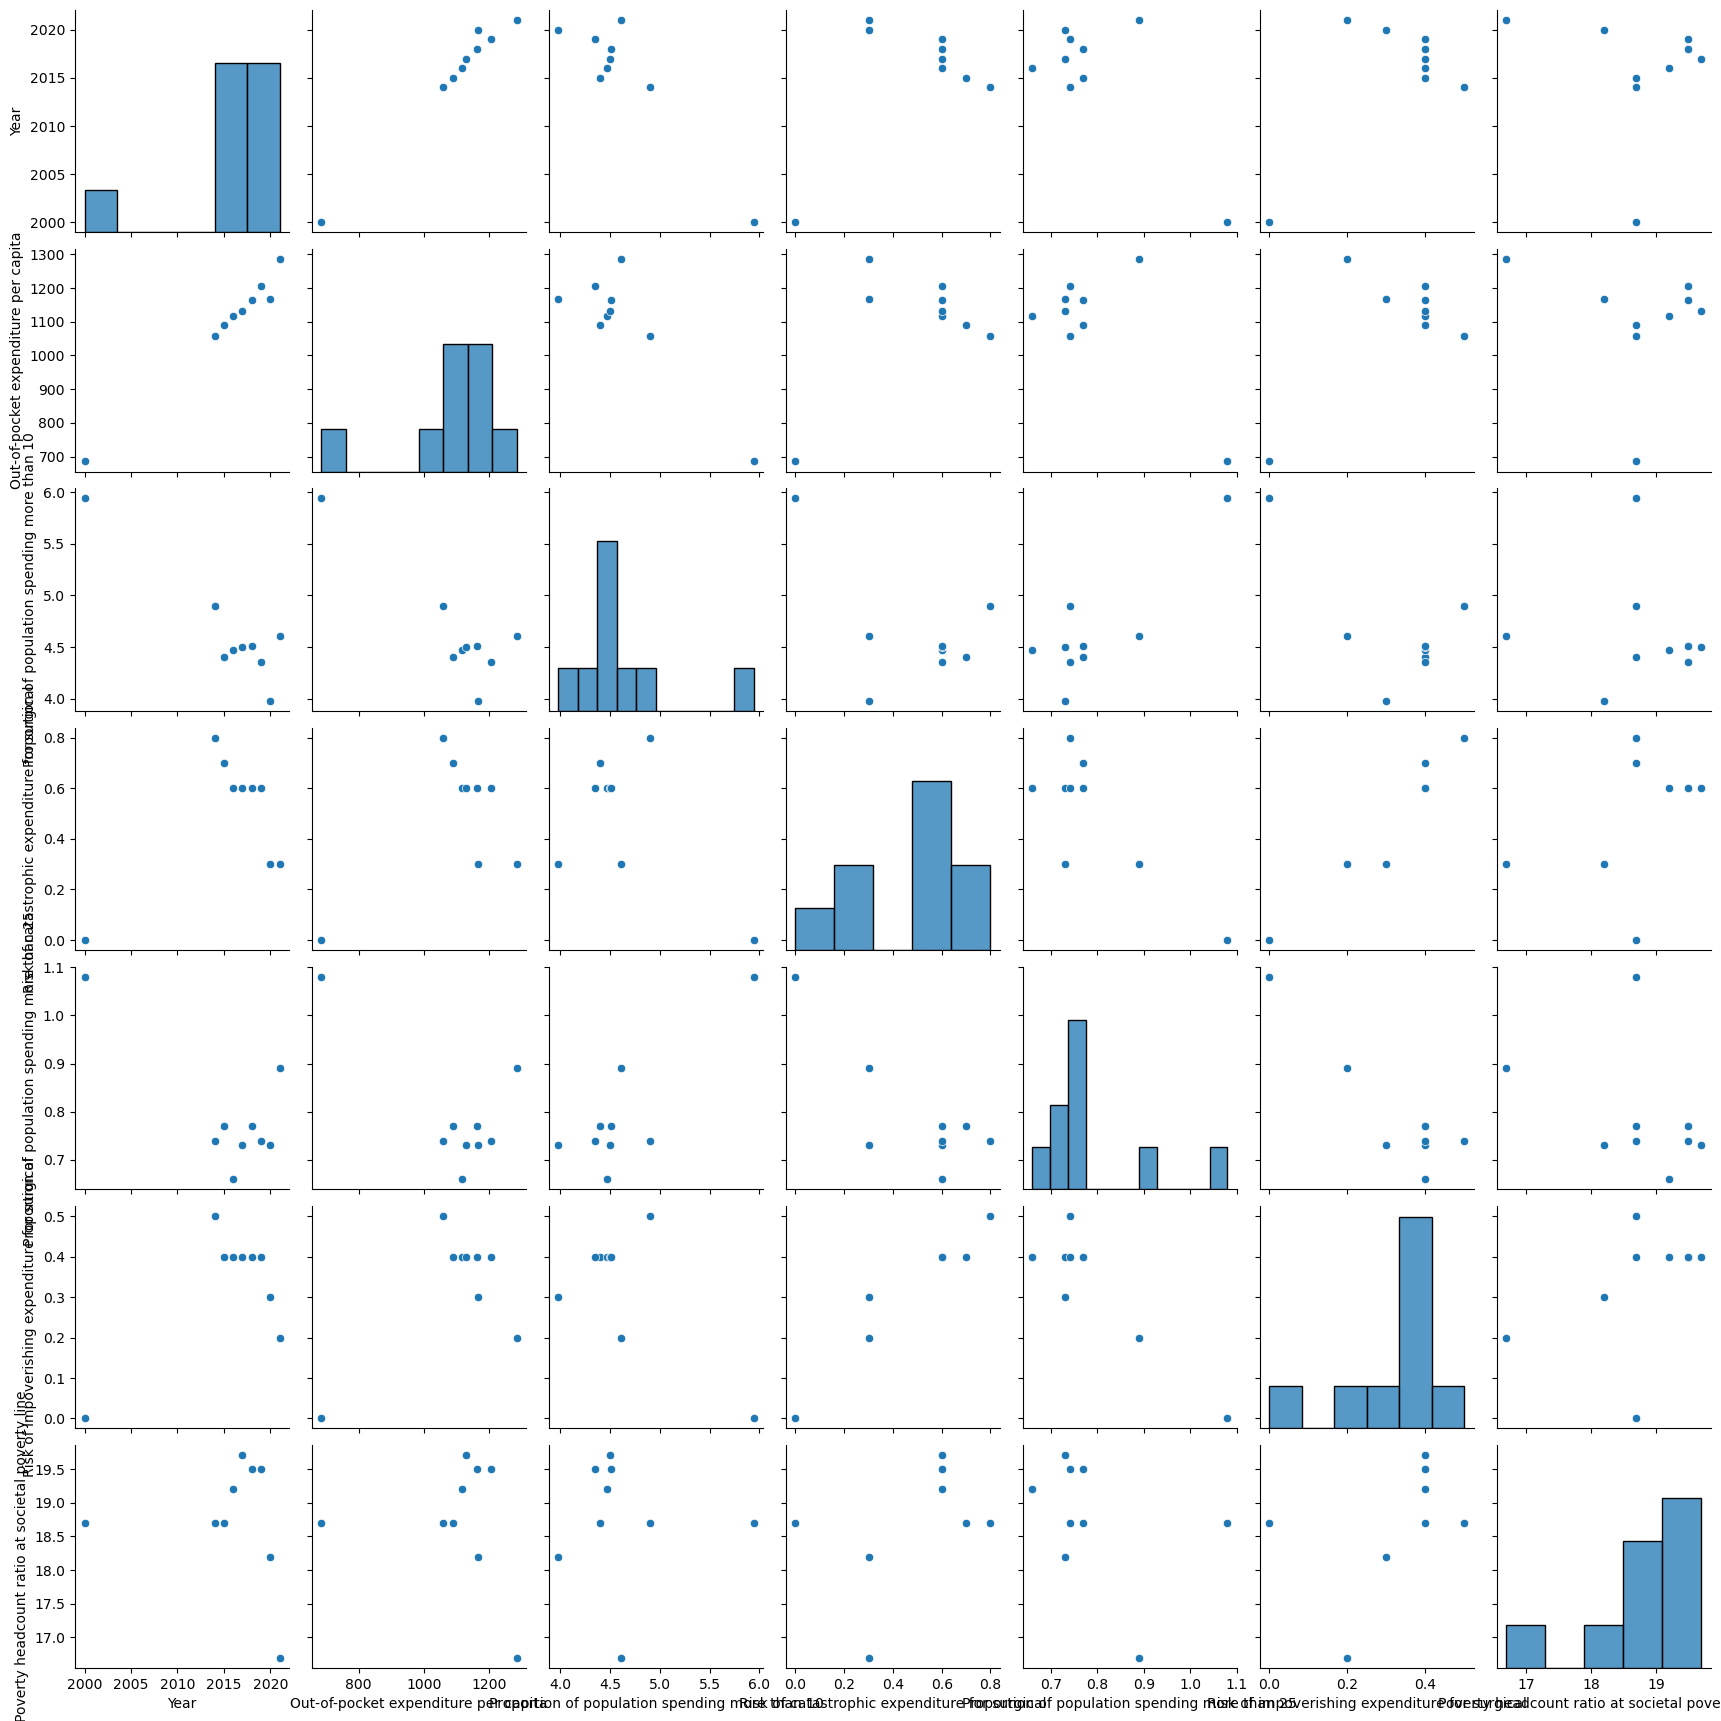

In [66]:
sns.pairplot(worldbank_sub)

In [68]:
#I'll save this subset of the data.
worldbank_sub.to_csv('worldbank_subset_cleaned.csv')